## modelos de regresion Lineal
### Modelos con datos simulados
* y = a + b*x
* X : 100 valores distribuidos segun una N(1.5, 2.5)
* Ye = 5 + 1.9 * x + w
* e se distribuira segun N(0,0.8)

In [1]:
import pandas as pd
import numpy as np

In [32]:
#generamos la distrubución de los valores de x
x = 1.5 + 2.5 * np.random.randn(100)

In [33]:
#distrubucion de los errores "e"
res = 0 + 0.8 * np.random.randn(100)

In [34]:
#generaremos una prediccion simulada de los valores
y_pred = 5 + 1.9 *x

In [35]:
#este otro grupo de valores actuara como los valores reales, la idea es ver si los que generamos en y_pred se les acercan
y_act = 5 + 1.9 *x + res

In [36]:
#creamos el dataframe de prueba, pasando primero los valores antes creados a formato lista, para luego crear el dataframe
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [37]:
#creamos el diccionario
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_prediccion":y_pred_list
    }
)

In [38]:
data.head()

,x,y_actual,y_prediccion
0,3.279772,12.001677,11.231566
1,2.531045,10.369042,9.808986
2,0.715705,7.091559,6.359839
3,2.914074,9.847537,10.536740
4,0.711537,7.388434,6.351921


In [9]:
#verificar la precision de la y_prediccion que hemos simulado, se ve que la linea azul se ajusta muy bien a los datos en rojo 
import matplotlib.pyplot as plt

In [19]:
y_mean = [np.mean(y_act) for i in range(1,len(x_list) + 1)] # vector que tiene el promedio en cada valor de x

Text(0.5,1,'Valor actual v/s prediccion')

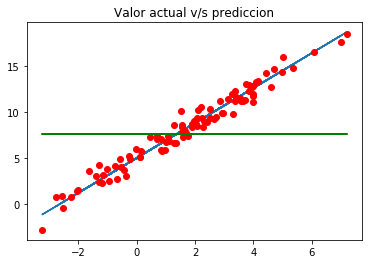

In [65]:
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x,y_act,"ro")
plt.plot(x,y_mean,"g")
plt.title("Valor actual v/s prediccion")

In [56]:
#agregaremos al dataframe los 3 factores para comparar y ver el ajuste del modelo en relacion a los datos, con el estadistico
#suma de los cuadrados de la regresion / suma de cuadrados totales R2 = SSR/SST, mejor mientras mas se acerca a 1
data["SSR"] = (data["y_prediccion"] - np.mean(y_act))**2
data["SSD"] = (data["y_prediccion"] - data["y_actual"])**2
data["SST"] = (data["y_actual"] - np.mean(y_act))**2

In [41]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,3.279772,12.001677,11.231566,8.699527,0.593070,13.835474
1,2.531045,10.369042,9.808986,2.331470,0.313663,4.355451
2,0.715705,7.091559,6.359839,3.694972,0.535414,1.417317
3,2.914074,9.847537,10.536740,5.083536,0.475001,2.450687
4,0.711537,7.388434,6.351921,3.725477,1.074360,0.798585


In [57]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [62]:
SSR +SSD

1799.0399074439679

In [63]:
SST

1718.8452395325862

In [59]:
R2 = SSR/SST

In [61]:
R2

1.0127373667453388

In [66]:
SSD

58.30110571697562

(array([ 1.,  2.,  6., 13., 19., 11., 20., 18.,  6.,  4.]),
 array([-2.19791516, -1.81137315, -1.42483113, -1.03828911, -0.65174709,
        -0.26520507,  0.12133694,  0.50787896,  0.89442098,  1.280963  ,
         1.66750502]),
 <a list of 10 Patch objects>)

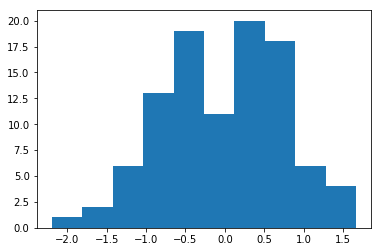

In [67]:
#ver si el error se distribuye de forma normal
plt.hist(data["y_prediccion"] - data["y_actual"])

## Obteniendo la recta de regresión
* y = a+b*x
* b = sum((xi-x_m)*(y_i-y_m) / sum((xi-x_m)^2)
* a = y_m -b*x_m

In [68]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.7154788234667768, 8.282070270684303)

In [70]:
#numerador de las betas
data["beta_n"] = (data["x"] - x_mean)*(data["y_actual"]-y_mean)
#denominador de las betas
data["beta_d"] = (data["x"] - x_mean)**2

In [71]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [73]:
alpha = y_mean -beta*x_mean

In [74]:
alpha,beta

(5.0976459789197754, 1.8562888962564907)

### En conclusion el modelo obtenido por regresion será
* y = 5.0976459789197754 + *x

In [75]:
#agreamos al data set los valores que se obtendrían aplicando el modelo
data["y_model"] = alpha + beta *data["x"]

In [76]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,3.279772,12.001677,11.231566,8.699527,0.593070,13.835474,5.818554,2.447012,11.185850
1,2.531045,10.369042,9.808986,2.331470,0.313663,4.355451,1.702064,0.665148,9.795997
2,0.715705,7.091559,6.359839,3.694972,0.535414,1.417317,1.190242,0.999548,6.426201
3,2.914074,9.847537,10.536740,5.083536,0.475001,2.450687,1.876361,1.436630,10.507009
4,0.711537,7.388434,6.351921,3.725477,1.074360,0.798585,0.897158,1.007899,6.418465


In [77]:
#Calculamos nuevamente el estadistico R2 para ver la precision del modelo de regresion
SSR = sum((data["y_model"] - y_mean)**2)
SSD = sum((data["y_model"] - data["y_actual"])**2)
SST = sum((data["y_actual"] - y_mean)**2)

In [78]:
SSR,SSD,SST

(1661.516775335372, 57.328464197213975, 1718.8452395325862)

In [79]:
R2 = SSR/SST
R2

0.9666471053480045

### Calculando error estadar residual RSE

In [81]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.764842682218376

In [82]:
np.mean(data["y_actual"])

8.282070270684303

In [84]:
#llevamos a porcentaje sobre la media de la prediccion la cantidad de error estandar
RSE / np.mean(data["y_actual"])*100

9.234921429315296